In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import datetime

Data collection and Proccessing of Data

In [15]:
#loading the data from the csv file to the pandas dataframe
df = pd.read_csv('CarData\Data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
#Checking the number of rows and colums present in the data set
df.shape

(301, 9)

In [18]:
# Getting some information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
#Checking the Data for any missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [21]:
#Inspecting and checking for categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the data,changing the alphabetical data into numerical data ,for the project

In [23]:
#Encoding the "Fuel_Type column"data
pd.set_option('future.no_silent_downcasting', True)
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column data
pd.set_option('future.no_silent_downcasting', True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column data
pd.set_option('future.no_silent_downcasting', True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [24]:
#now leest see the revised data
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Now We will add a new colum to the dataset,and remove the car_name column

In [26]:
today = datetime.date.today()
this_year = today.year
print(this_year)

2024


In [27]:
df['Years_old'] = this_year -  df['Year'] 

In [29]:
df['Years_old']

0      10
1      11
2       7
3      13
4      10
       ..
296     8
297     9
298    15
299     7
300     8
Name: Years_old, Length: 301, dtype: int64

In [30]:
new_Cardataset = df[['Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Years_old']]

In [31]:
new_Cardataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,3.35,5.59,27000,0,0,0,0,10
1,4.75,9.54,43000,1,0,0,0,11
2,7.25,9.85,6900,0,0,0,0,7
3,2.85,4.15,5200,0,0,0,0,13
4,4.60,6.87,42450,1,0,0,0,10


 checking the correlation between columns just to do dimensionality reduction or selection of important columns.

In [32]:
new_Cardataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
Selling_Price,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216,0.524342
Fuel_Type,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705,-0.053643
Seller_Type,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269,0.039896
Transmission,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316,0.000394
Owner,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000,0.182104
Years_old,-0.236141,0.047584,0.524342,-0.053643,0.039896,0.000394,0.182104,1.000000


As it is in the numeric form it's difficult to understand correlation with each other. So we will visualize this in diagramatical form using charts like pairplot and heatmap.

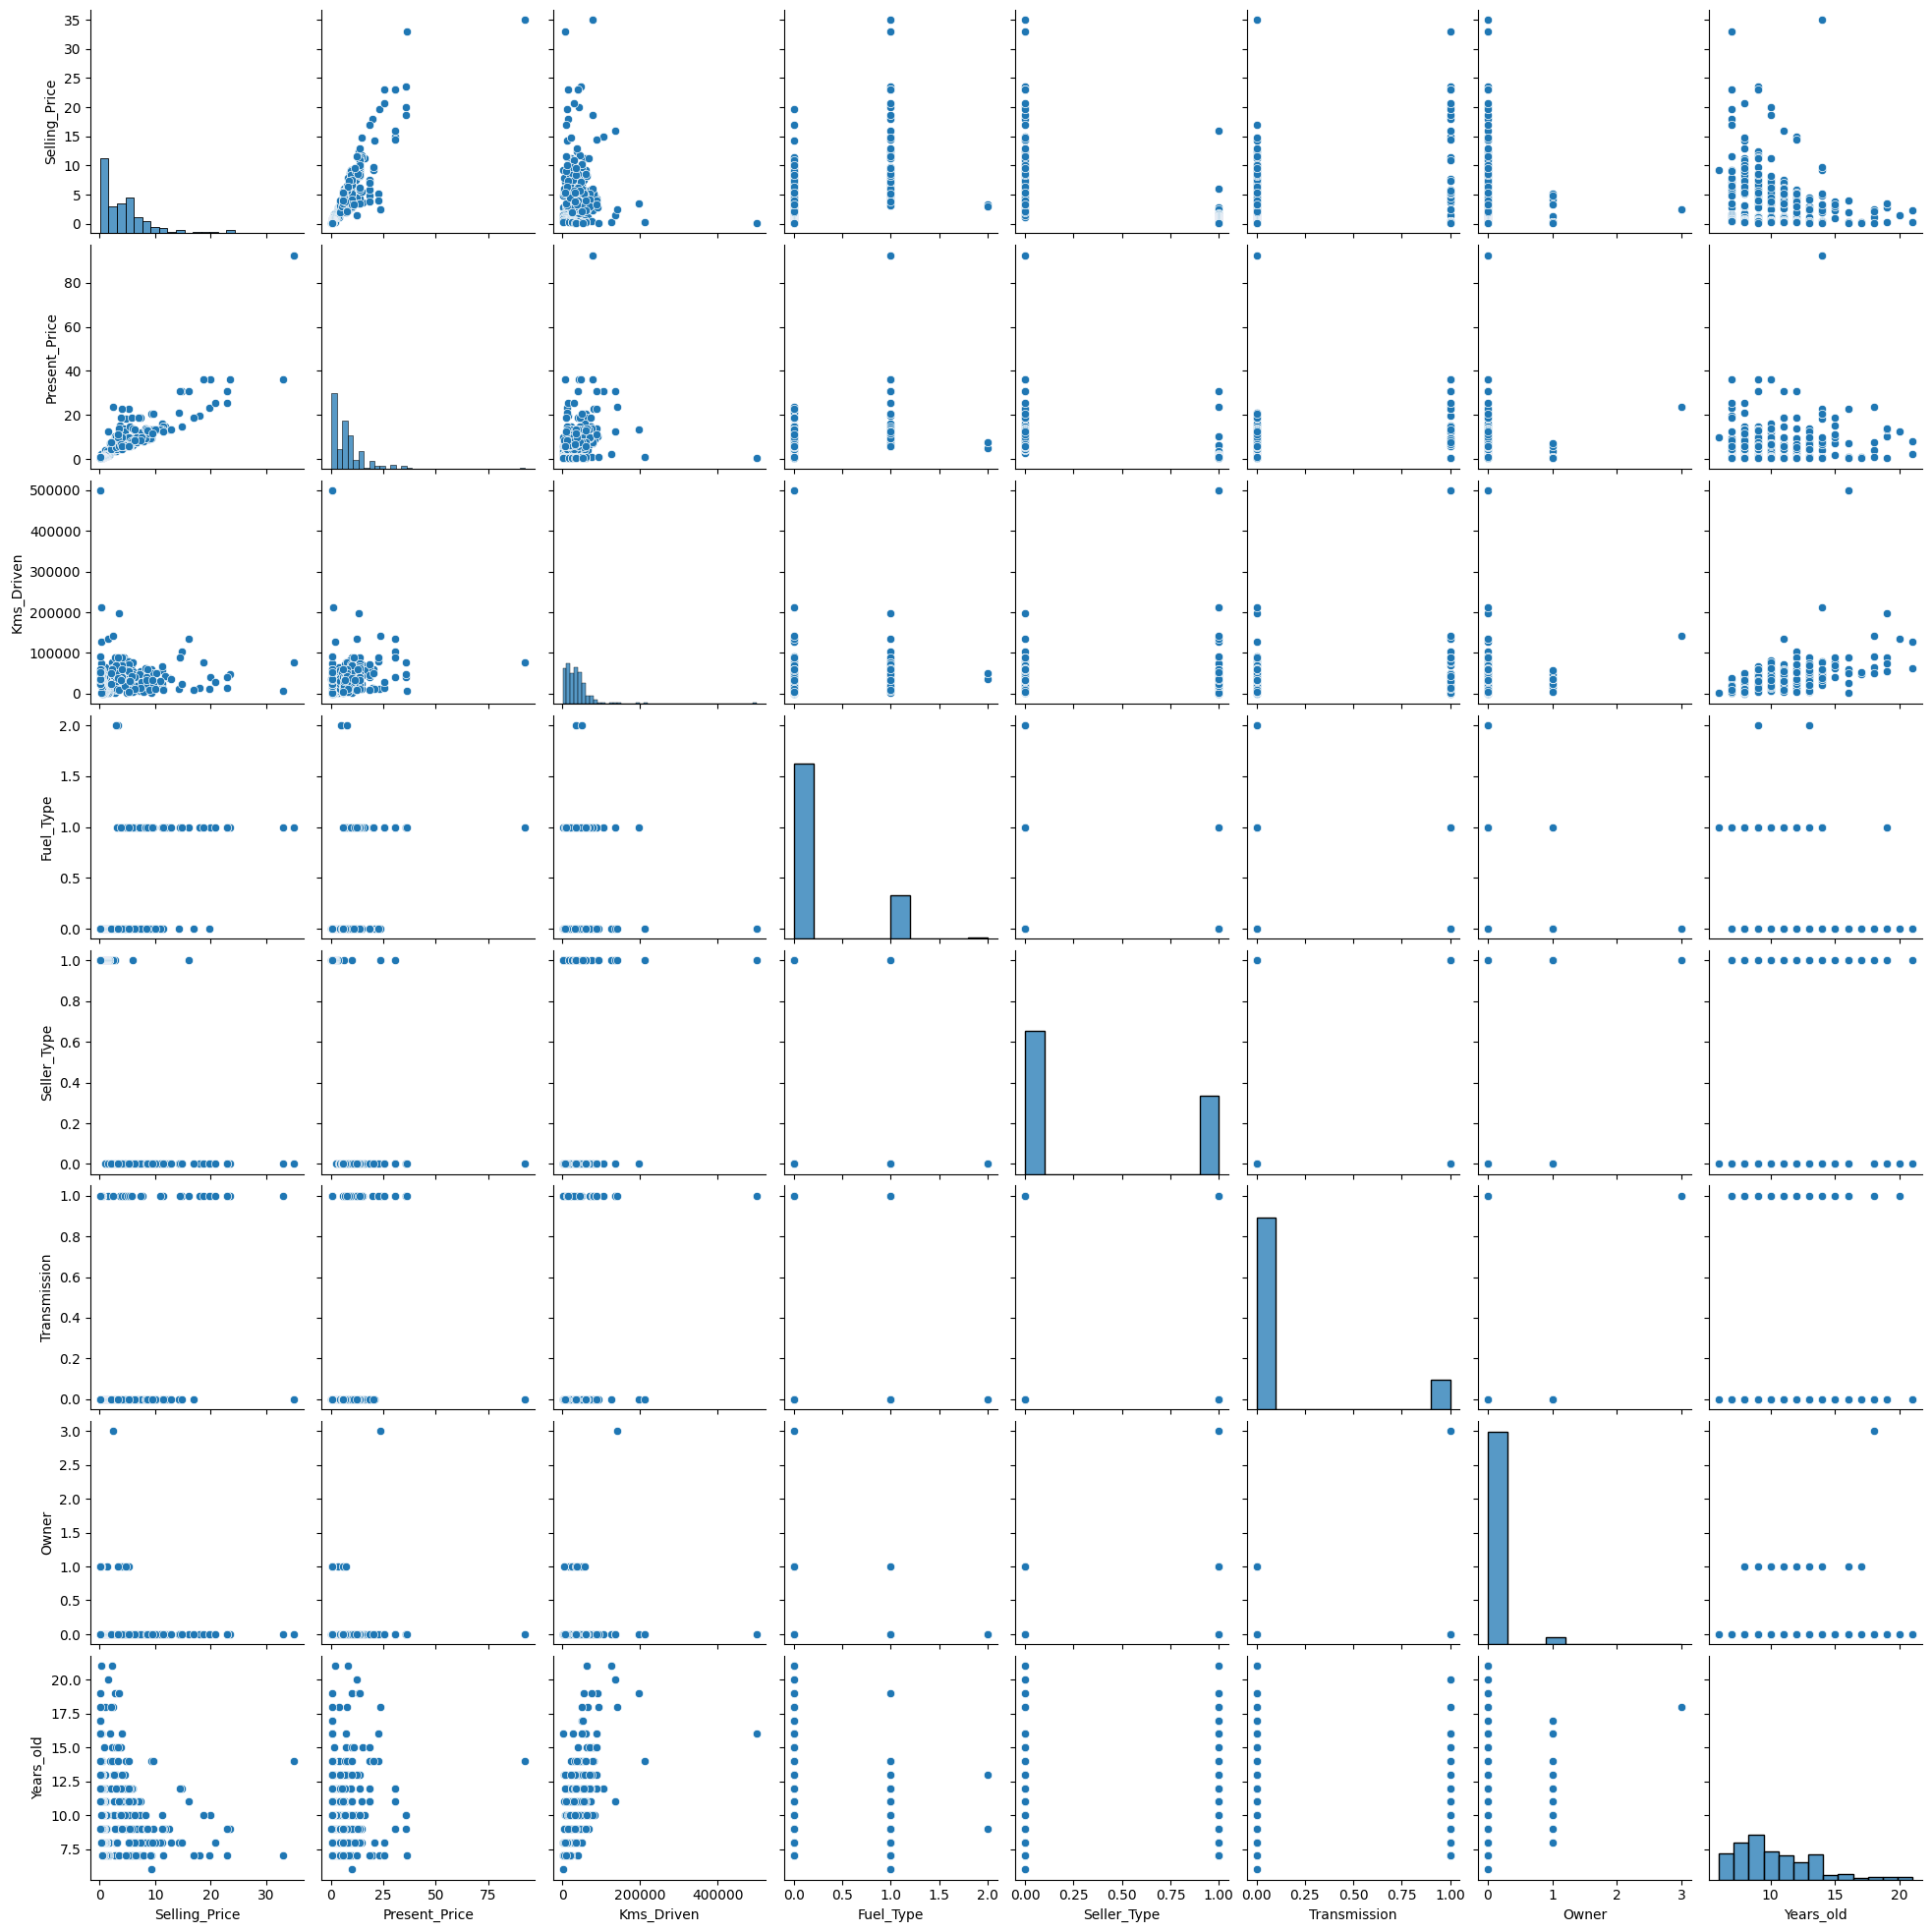

In [33]:
sns.pairplot(new_Cardataset)

In 'Heatmap' diagram  it  clearly visible which column is positively correlated with each other and important column  for model building

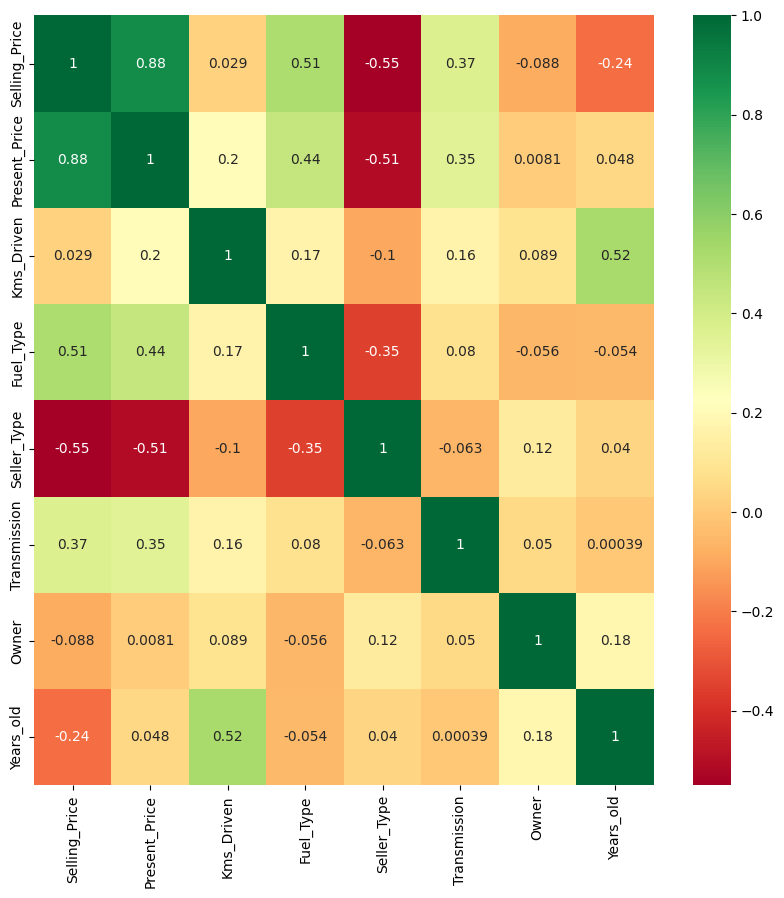

In [35]:
corrmat = new_Cardataset.corr()
top_feat = corrmat.index
plt.figure(figsize=(10,10))
h = sns.heatmap(new_Cardataset[top_feat].corr(), annot=True, cmap="RdYlGn")

Splitting the data and Target

In [38]:
new_Cardataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,3.35,5.59,27000,0,0,0,0,10
1,4.75,9.54,43000,1,0,0,0,11
2,7.25,9.85,6900,0,0,0,0,7
3,2.85,4.15,5200,0,0,0,0,13
4,4.60,6.87,42450,1,0,0,0,10


In [39]:
x = new_Cardataset.iloc[:,1:]
y = new_Cardataset.iloc[:,0]

In [40]:
x.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,5.59,27000,0,0,0,0,10
1,9.54,43000,1,0,0,0,11
2,9.85,6900,0,0,0,0,7
3,4.15,5200,0,0,0,0,13
4,6.87,42450,1,0,0,0,10


In [41]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

Model Training
  1.linear Regression

In [49]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [50]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [51]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(x_train)

In [52]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493707


Visualize the actual price and predicted price

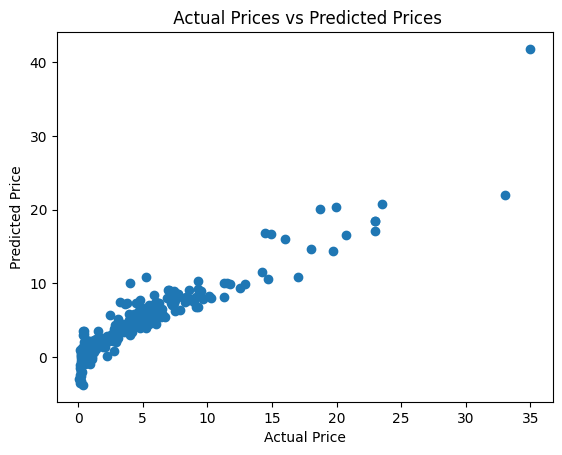

In [53]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [54]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(x_test)

In [55]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715024979


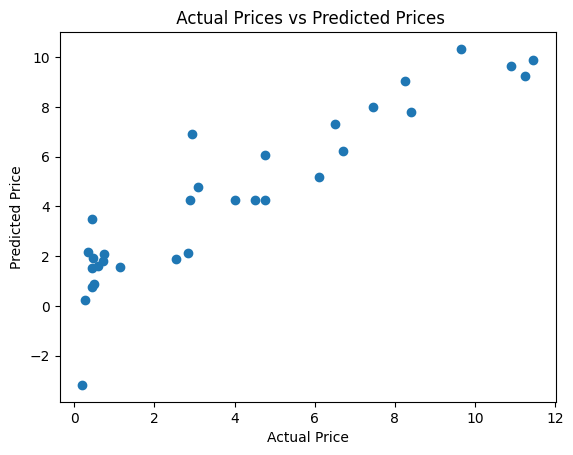

In [56]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Lasso Regression

In [57]:
# loading the linear regression model
lass_reg_model = Lasso()

In [58]:
lass_reg_model.fit(x_train,y_train)

Lasso()

Model Evaluation

In [59]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(x_train)

In [60]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427865861257862


Visulaize the actual price vs predicted price

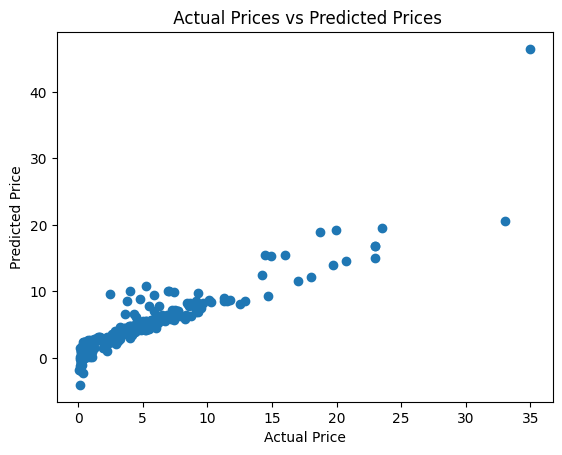

In [61]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [62]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(x_test)

In [63]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709151424834702


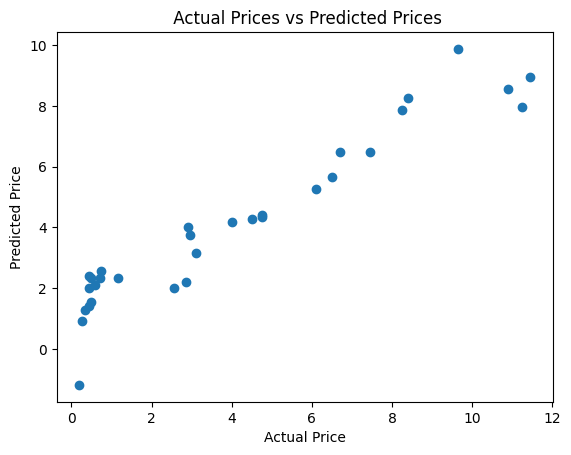

In [64]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()